### Note: Data extraction: this project will only analyze the USA twitter data before the USA president election (October 15-November 3 2020). 
* tweets of USA up to Nov 3 have been extracted. 
* tweets are collected with separate hashtag of 'biden' and 'trump" with a lot of tweets containing both hashtags /names. the two datasets are concated for preprocessing and further comparison analysis.  

In [2]:
import pandas as pd  
import numpy as np 
import seaborn as sns 

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words=stopwords.words('english')

from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from wordcloud import WordCloud
import re

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cryst\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### step 1: data extraction

In [2]:
df1=pd.read_csv('hashtag_donaldtrump.csv', lineterminator='\n')
df2=pd.read_csv('hashtag_joebiden.csv',lineterminator='\n' )

In [3]:
df1.country.value_counts()  ## find the usa country names

United States of America    178899
United Kingdom               34743
United States                34364
Germany                      22618
France                       20689
                             ...  
Vanuatu                          2
Antigua and Barbuda              1
Samoa                            1
Northern Mariana Islands         1
Gabon                            1
Name: country, Length: 185, dtype: int64

In [3]:
df1.shape  # total tweets of trump are 971K

(970919, 21)

In [4]:
df2.shape # total tweets of biden are 777K

(776886, 21)

In [4]:
df1.columns

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')

In [4]:
# only extracting USA tweets
d1=df1.loc[(df1.country=='United States of America') | (df1.country=='United States')]
d2=df2.loc[(df2.country=='United States of America') | (df2.country=='United States')]

In [6]:
print(d1.shape, d2.shape)

(213263, 21) (181137, 21)


In [5]:
# concatenate two twitter datasets 
biden=d2[['created_at', 'tweet_id','tweet', 'user_location', 'lat', 'long', 'state']]
trump=d1[['created_at', 'tweet_id','tweet', 'user_location', 'lat', 'long', 'state']]
data=pd.concat([biden, trump])

In [6]:
data.shape

(394400, 7)

In [7]:
data.drop_duplicates(inplace=True)  ## remove the duplicated tweets 

In [8]:
data.shape

(356497, 7)

In [11]:
data.isnull().sum()  # about 55K tweets don't have state data

created_at           0
tweet_id             0
tweet                0
user_location        0
lat                  0
long                 0
state            55164
dtype: int64

### step 2: data cleaning

In [4]:
df=data.copy()

In [5]:
custom_stop_words=['2020','election', 'vote', 'president', 'presidents', 'US', 'us', 'america', 'American', 'elections', 'campaign', 'unites state', 'unite state', 'usa','americans', 'white house', 'amp']
lemma=WordNetLemmatizer()

In [6]:
def clean_twitter(twitter):
    twitter=re.sub(r'http\S+', '',twitter)
    twitter=re.sub('[^a-zA-Z]',' ',twitter)
    twitter=re.sub(r'#', '', twitter)
    twitter=str(twitter).lower()
    twitter=re.sub(r'\w+trump','trump',twitter)
    twitter=re.sub(r'\w+biden','biden',twitter)
    twitter=re.sub(r'joe','biden',twitter)
    twitter=re.sub(r'donald','trump',twitter)
    twitter=word_tokenize(twitter)
    twitter=[i for i in twitter if i not in stop_words]
    twitter=[i for i in twitter if i not in custom_stop_words]
    twitter=[lemma.lemmatize(word=w) for w in twitter]
    twitter=[i for i in twitter if len(i)>2]
    twitter=' '.join(twitter)
    return twitter

In [7]:
df['tweet_cleaned']=df['tweet'].apply(clean_twitter)
df

,Unnamed: 0,created_at,tweet_id,tweet,user_location,lat,long,state,tweet_cleaned
0,0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,Florida,elecciones florida biden dice que trump solo p...
1,2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,Golden Valley Arizona,46.304036,-109.171431,Montana,islandgirlprv bradbeauregardj meidastouch bide...
2,4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,"California, USA",36.701463,-118.755997,California,censorship biden biden bidenemails bidenemail ...
3,6,2020-10-15 00:00:25,1.316529e+18,"In 2020, #NYPost is being #censorship #CENSORE...","Chicago, Illinois",41.875562,-87.624421,Illinois,nypost censorship censored twitter manipulate ...
4,11,2020-10-15 00:00:57,1.316529e+18,"FBI Allegedly Obtained Hunter Biden Computer, ...","Kentucky, USA",37.572603,-85.155141,Kentucky,fbi allegedly obtained hunter biden computer d...
...,...,...,...,...,...,...,...,...,...
356492,970888,2020-11-08 23:58:38,1.325589e+18,"@Jim_Jordan FCK NO , Democrats and the #msm la...","New York, USA",40.712728,-74.006015,New York,jim jordan fck democrat msm launched attack fa...
356493,970890,2020-11-08 23:58:44,1.325589e+18,Cómo pasó el abogado de Trump de un hotel a un...,New York City,40.712728,-74.006015,New York,abogado trump hotel aparcamiento junto sex sho...
356494,970893,2020-11-08 23:58:46,1.325589e+18,@DonaldJTrumpJr Being a #tRump you are intimat...,"New Jersey, USA",40.075738,-74.404162,New Jersey,trumpjr trump intimately familiar disgusting
356495,970900,2020-11-08 23:59:05,1.325589e+18,#Trump #Patriots #MAGA2020 https://t.co/2A8Fnm...,Hell on Earth,34.233137,-102.410749,Texas,trump patriot maga


In [9]:
# assign each tweet to 'trump' or 'biden' or both
trump_name='trump'
biden_name='biden'

In [10]:
def identify_candidate(text, name):
    counter=0
    if name in text.split():
            counter=1
    return counter
df['trump']=df['tweet_cleaned'].apply(lambda x: identify_candidate(x,trump_name))
df['biden']=df['tweet_cleaned'].apply(lambda x: identify_candidate(x, biden_name))

In [11]:
len(df[(df.trump==1) & (df.biden==0)]) ## number of tweets with only trump

154907

In [12]:
len(df[(df.trump==0) & (df.biden==1) ])   ##number of tweets with only biden

109959

In [13]:
len(df[(df.trump==1) & (df.biden==1) ])  ##number of tweets with both candidates

91627

In [14]:
len(df[(df.trump==0) & (df.biden==0)])  # 4 tweets without both names- ignore

4

In [16]:
df1=df[['created_at', 'state', 'tweet_cleaned', 'trump', 'biden']]

### step 3 data analysis and modeling: use both textblob and nltk.vader sentiment analyzer for polarity analysis 

In [22]:
# create a function to get the subjectivity using TextBlob
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create the function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

## create the columns for subjectivity and polarity
df1['Subjectivity']=df1['tweet_cleaned'].apply(getSubjectivity)
df1['Polarity']=df1['tweet_cleaned'].apply(getPolarity)

In [23]:
# Use nltk.vader Sentimentanalyzer
sid = SentimentIntensityAnalyzer()   
df1['sid_sentiment']=df1['tweet_cleaned'].apply(lambda x: sid.polarity_scores(x))  ## Applying Vader SentimentAnalyzer
df1['sid_overall']=df1['sid_sentiment'].apply(lambda x: x['compound'])  ## Create the sid_overall column for polarity score 

In [24]:
df1

,created_at,state,tweet_cleaned,trump,biden,Subjectivity,Polarity,sid_sentiment,sid_overall
0,2020-10-15 00:00:01,Florida,elecciones florida biden dice que trump solo p...,1,1,0.000000,0.00000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,2020-10-15 00:00:20,Montana,islandgirlprv bradbeauregardj meidastouch bide...,0,1,0.000000,0.00000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,2020-10-15 00:00:22,California,censorship biden biden bidenemails bidenemail ...,0,1,0.000000,0.00000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,2020-10-15 00:00:25,Illinois,nypost censorship censored twitter manipulate ...,1,1,0.678571,-0.14881,"{'neg': 0.186, 'neu': 0.644, 'pos': 0.17, 'com...",-0.1027
4,2020-10-15 00:00:57,Kentucky,fbi allegedly obtained hunter biden computer d...,0,1,0.100000,-0.10000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
...,...,...,...,...,...,...,...,...,...
356492,2020-11-08 23:58:38,New York,jim jordan fck democrat msm launched attack fa...,1,0,0.000000,0.00000,"{'neg': 0.279, 'neu': 0.553, 'pos': 0.168, 'co...",-0.6842
356493,2020-11-08 23:58:44,New York,abogado trump hotel aparcamiento junto sex sho...,1,0,0.000000,0.00000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
356494,2020-11-08 23:58:46,New Jersey,trumpjr trump intimately familiar disgusting,1,0,0.750000,-0.31250,"{'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'comp...",-0.5267
356495,2020-11-08 23:59:05,Texas,trump patriot maga,1,0,0.000000,0.00000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [30]:
## compare the two polarity data (textblob and vader): total 264K tweets have different polarity score 
polarity=df1[df1.Polarity!=df1.sid_overall]
polarity   

,created_at,state,tweet_cleaned,trump,biden,sid_sentiment,Subjectivity,Polarity,sid_overall
3,2020-10-15 00:00:25,Illinois,nypost censorship censored twitter manipulate ...,1,1,"{'neg': 0.186, 'neu': 0.644, 'pos': 0.17, 'com...",0.678571,-0.14881,-0.1027
4,2020-10-15 00:00:57,Kentucky,fbi allegedly obtained hunter biden computer d...,0,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.100000,-0.10000,0.0000
5,2020-10-15 00:01:23,Florida,comment democrat understand ruthless china chi...,1,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1.000000,-1.00000,0.0000
6,2020-10-15 00:01:42,Illinois,effort find truth allegation twitter allowing ...,0,1,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.000000,0.00000,0.5423
7,2020-10-15 00:01:47,California,twitter everything help democrat win making su...,1,1,"{'neg': 0.245, 'neu': 0.464, 'pos': 0.291, 'co...",0.522222,0.17500,0.1027
...,...,...,...,...,...,...,...,...,...
356489,2020-11-08 23:58:14,Illinois,trump marklevinshow hoax american people spoke...,1,0,"{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp...",0.000000,0.00000,-0.2732
356490,2020-11-08 23:58:16,California,rbreich bob pretty straight forward trump conc...,1,0,"{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'comp...",0.700000,0.22500,0.6249
356492,2020-11-08 23:58:38,New York,jim jordan fck democrat msm launched attack fa...,1,0,"{'neg': 0.279, 'neu': 0.553, 'pos': 0.168, 'co...",0.000000,0.00000,-0.6842
356494,2020-11-08 23:58:46,New Jersey,trumpjr trump intimately familiar disgusting,1,0,"{'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'comp...",0.750000,-0.31250,-0.5267


In [25]:
# based on polarity score, assign sentiment
def assign_sentiment(polarity):
    if polarity>0:
        return "Positive"
    elif polarity<0:
        return "Negative"
    else:
        return 'Neutral'

In [26]:
df1['textblob_sentiment']=df1['Polarity'].apply(assign_sentiment)
df1['sid_overall_sentiment']=df1['sid_overall'].apply(assign_sentiment)

In [27]:
df1

,created_at,state,tweet_cleaned,trump,biden,Subjectivity,Polarity,sid_sentiment,sid_overall,textblob_sentiment,sid_overall_sentiment
0,2020-10-15 00:00:01,Florida,elecciones florida biden dice que trump solo p...,1,1,0.000000,0.00000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,Neutral
1,2020-10-15 00:00:20,Montana,islandgirlprv bradbeauregardj meidastouch bide...,0,1,0.000000,0.00000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,Neutral
2,2020-10-15 00:00:22,California,censorship biden biden bidenemails bidenemail ...,0,1,0.000000,0.00000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,Neutral
3,2020-10-15 00:00:25,Illinois,nypost censorship censored twitter manipulate ...,1,1,0.678571,-0.14881,"{'neg': 0.186, 'neu': 0.644, 'pos': 0.17, 'com...",-0.1027,Negative,Negative
4,2020-10-15 00:00:57,Kentucky,fbi allegedly obtained hunter biden computer d...,0,1,0.100000,-0.10000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Negative,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
356492,2020-11-08 23:58:38,New York,jim jordan fck democrat msm launched attack fa...,1,0,0.000000,0.00000,"{'neg': 0.279, 'neu': 0.553, 'pos': 0.168, 'co...",-0.6842,Neutral,Negative
356493,2020-11-08 23:58:44,New York,abogado trump hotel aparcamiento junto sex sho...,1,0,0.000000,0.00000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,Neutral
356494,2020-11-08 23:58:46,New Jersey,trumpjr trump intimately familiar disgusting,1,0,0.750000,-0.31250,"{'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'comp...",-0.5267,Negative,Negative
356495,2020-11-08 23:59:05,Texas,trump patriot maga,1,0,0.000000,0.00000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,Neutral


### step 4 - split data for before election and after election (maybe analyze sentiment or topics for after election data later)

In [28]:
df1['date']=pd.to_datetime(df1.created_at)

In [29]:
## create time series data
df2=df1.set_index(df1.date)
df2.drop(columns=['created_at'], inplace=True)

In [31]:
before_election=df2.loc[df2.date<'2020-11-04 00:00:00']
after_election=df2.loc[df2.date>='2020-11-04 00:00:00']
print(f'total tweet before election: {len(before_election)}')
print(f'total tweet after election: {len(after_election)}')


total tweet before election: 243347
total tweet after election: 113150


In [33]:
## for before election tweets, how many are neutral sentiment based on Vader
print('the total neutral sentiment tweets based on NLTK.Vader SentimentAnalyzer are', len(before_election[before_election.sid_overall==0]))

the total neutral sentiment tweets based on NLTK.Vader SentimentAnalyzer are 75710


In [34]:
## for before election tweets, how many are neutral sentiment based on TextBlob
print('the total neutral sentiment tweets based on bextblob are', len(before_election[before_election.Polarity==0]))

the total neutral sentiment tweets based on bextblob are 107801


In [45]:
#neutral_tweets=before_election[(before_election.sid_overall!=0) & (before_election.Polarity==0)]
pd.set_option('display.max_columns', None)
neutral_tweets[['tweet_cleaned', 'sid_overall_sentiment']].sample(20)

,tweet_cleaned,sid_overall_sentiment
date,,
2020-10-18 08:57:53,trump billboard texas vandalized altered say t...,Negative
2020-10-26 22:32:06,putinspuppet vlad criticizing boy donnie momen...,Negative
2020-11-03 22:22:24,dustinbones nicoletteerasms bidenharris father...,Negative
2020-10-22 00:08:28,fed russia iran interfered presidential moscow...,Positive
2020-10-18 22:14:06,trump made surprise appearance international c...,Positive
2020-11-02 20:17:00,comizi negli ultimi giorni non male per vecchi...,Positive
2020-10-23 01:04:34,candidate promise release classified file rela...,Positive
2020-10-30 20:18:15,unionstrong save bringing trump victory michig...,Positive
2020-10-16 12:08:05,via rawstory trump aide lament guthrie town ha...,Negative


### Note: before election twitter data:
* total 243K tweets
* based on textblob total 107K neutral
* based on Vader total 75K neutral
* The vader has assigned more textblob labled neutral data to either positive or negative, and make more sense
* use vader for further analysis 

### step 5 Analysis Summary (grouping / visualization et al)

In [3]:
before_election=pd.read_csv('before_election.csv')

In [11]:
dft=before_election[['date','state', 'trump', 'biden','sid_overall_sentiment','sid_overall']]

In [12]:
## create the US states abbrev dictionary for geomap
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'}

In [13]:
dw=pd.read_csv('us_election_state_result.csv')  ## the table includes the final state with its winning candidate name 

In [14]:
df=dft.dropna()  ## remove the null state value
df_trump=df[df.trump==1]  ## trump data summary
df_biden=df[df.biden==1]  ## biden summary 
trump_state=df_trump.groupby(['state']).count()
dt=trump_state.reset_index()
#dt=df[['state', 'trump', 'state_code']]
dt['state_code']=dt['state'].map(us_state_abbrev)

In [15]:
biden_state=df_biden.groupby(['state']).count()
db=biden_state.reset_index()
top10_biden=db.sort_values(by='date', ascending=False).head(10)[['state', 'sid_overall']]
top10_biden=pd.merge(top10_biden, dw, left_on='state', right_on='states', how='left')
db['state_code']=db['state'].map(us_state_abbrev)
#top10_biden ## top 10 tweeted states mentioning 'biden' 

In [16]:
# top 10 tweeted states mentioning 'trump' 
top10_trump=dt.sort_values(by='date', ascending=False).head(10)[['state', 'sid_overall']]
top10_trump.columns=['state', 'trump_tweets_numbers']
top10_trump

,state,trump_tweets_numbers
4,California,25113
33,New York,18885
9,Florida,13875
45,Texas,12982
8,District of Columbia,7137
39,Pennsylvania,5721
14,Illinois,5338
31,New Jersey,4227
36,Ohio,4191
22,Massachusetts,3935


In [17]:
top10_trump=pd.merge(top10_trump, dw, left_on='state', right_on='states',how='left')
t1=top10_trump[top10_trump['final_winning']=='trump']
t1 

,state,trump_tweets_numbers,states,final_winning
2,Florida,13875,Florida,trump
3,Texas,12982,Texas,trump
8,Ohio,4191,Ohio,trump


In [18]:
top10=pd.merge(top10_trump, top10_biden, left_on='state', right_on='state', how='outer')
top10=top10[['state', 'trump_tweets_numbers', 'sid_overall', 'final_winning_x']]
top10.columns=['state', 'trump_tweets_numbers', 'biden_tweets_numbers', 'final_winning']
top10

,state,trump_tweets_numbers,biden_tweets_numbers,final_winning
0,California,25113,18363,biden
1,New York,18885,14119,biden
2,Florida,13875,10030,trump
3,Texas,12982,10220,trump
4,District of Columbia,7137,4424,biden
5,Pennsylvania,5721,4336,biden
6,Illinois,5338,3674,biden
7,New Jersey,4227,3074,biden
8,Ohio,4191,3568,trump
9,Massachusetts,3935,2618,biden


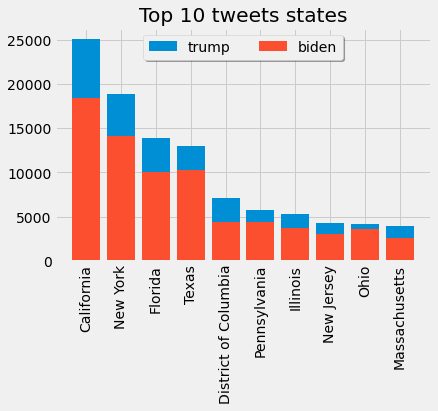

In [86]:
fig, ax=plt.subplots()
ax.bar(top10['state'],top10['trump_tweets_numbers'], label='trump')
ax.bar(top10['state'],top10['biden_tweets_numbers'], label='biden')
labels=ax.get_xticklabels()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
ax.set_title('Top 10 tweets states')
plt.setp(labels,rotation=90)
plt.show()

#### plotly geo map

In [31]:
map_trump = dict(type='choropleth',
            locations=dt['state_code'],
            locationmode='USA-states',
            colorscale='Reds',
            text=dt['state'],
            marker=dict(line=dict(color='rgb(255,0,0)', width=2)),
            z=dt['sid_overall'],
            colorbar=dict(title="Trump Mentioned Tweets Numbers"))
           
map_biden = dict(type='choropleth',
            locations=dt['state_code'],
            locationmode='USA-states',
            colorscale='Reds',
            text=db['state'],
            marker=dict(line=dict(color='rgb(255,0,0)', width=2)),
            z=db['sid_overall'],
            colorbar=dict(title="Biden Mentioned Tweets Numbers"))

In [36]:
map_layout = dict(title="Trump Mentioned Tweets Numbers",
              geo=dict(scope='usa',
                         showlakes=False,
                         lakecolor='rgb(85,173,240)'))
map_layoutb=dict(title="Biden Mentioned Tweets Numbers",
              geo=dict(scope='usa',
                         showlakes=False,
                         lakecolor='rgb(85,173,240)'))

In [58]:
map_actual = go.Figure(data=[map_trump], layout=map_layout)
iplot(map_actual)

In [63]:
map_actual_biden=go.Figure(data=[map_biden], layout=map_layoutb)
iplot(map_actual_biden)

### Generate features for further analysis 
* generate the "ploarity ratio" = positive / negative for each candidate to see whether there are some correlations of the polarity ratio with the final winning results 
* generate the "pissibility of being voted"= (positive count + neutral count) / (total count) to see whether this variable has some correlation with the final winning result

In [10]:
df_trump_positive=df_trump[df_trump.sid_overall_sentiment=='Positive'].groupby('state').count()
df_trump_negative=df_trump[df_trump.sid_overall_sentiment=='Negative'].groupby('state').count()
#df_trump_negative=df_trump[df_trump.sid_overall_sentiment=='Negative'].groupby('state').to_frame()
trump=pd.concat([df_trump_positive,df_trump_negative], axis=1)
trump=trump.iloc[:, [0,5]]
trump.columns=['postive_count', 'negative_count']
trump['ratio']=round(trump['postive_count']/trump['negative_count'],2)
trump.dropna(inplace=True)
t=trump.sort_values(by='ratio', ascending=False).head(20)


In [53]:
t1=pd.merge(t, dw, left_index=True, right_on='states', how='left')
t1     ## trump positive/negative polarity ratio. out of the top 20 ratios, 13 high ratios vote him

,postive_count,negative_count,ratio,states,final_winning
1,130.0,85,1.53,Alaska,trump
24,92.0,62,1.48,Mississippi,trump
27,140.0,101,1.39,Nebraska,trump
7,78.0,58,1.34,Delaware,biden
31,153.0,115,1.33,New Mexico,biden
40,84.0,64,1.31,Rhode Island,biden
42,24.0,19,1.26,South Dakota,trump
10,873.0,694,1.26,Georgia,biden
45,259.0,207,1.25,Utah,trump
49,106.0,86,1.23,West Virginia,trump


In [11]:
## biden positive/negative polarity ratio. out of the top 20 ratios, 7 high ratios vote him
df_biden_positive=df_biden[df_biden.sid_overall_sentiment=='Positive'].groupby('state').count()
df_biden_negative=df_biden[df_biden.sid_overall_sentiment=='Negative'].groupby('state').count()
biden=pd.concat([df_biden_positive,df_biden_negative], axis=1)
biden=biden.iloc[:, [0,5]]
biden.columns=['postive_count', 'negative_count']
biden['ratio']=round(biden['postive_count']/biden['negative_count'],2)
biden.dropna(inplace=True)
b=biden.sort_values(by='ratio', ascending=False).head(20)
b1=pd.merge(b, dw, left_index=True, right_on='states', how='left')
b1  



,postive_count,negative_count,ratio,states,final_winning
19,95.0,53,1.79,Maine,biden
39,98.0,55,1.78,Puerto Rico,Puerto Rico
7,94.0,60,1.57,Delaware,biden
43,622.0,399,1.56,Tennessee,trump
27,83.0,54,1.54,Nebraska,trump
16,286.0,187,1.53,Kansas,trump
49,114.0,75,1.52,West Virginia,trump
31,100.0,66,1.52,New Mexico,biden
47,612.0,419,1.46,Virginia,biden
28,629.0,433,1.45,Nevada,biden


#### * summary: for the  polarity ratin analysis, only top 2 polarity for each candidate are correct.It is inclusive using the polarity ratio to predict the final winning result

In [131]:
for c in [t1,b1]:
    c['state_code']=c['states'].map(us_state_abbrev)

In [132]:
t1.head(2)

,postive_count,negative_count,ratio,states,final_winning,state_code
1,130.0,85,1.53,Alaska,trump,AK
24,92.0,62,1.48,Mississippi,trump,MS


In [134]:
trump_polarity = dict(type='choropleth',
            locations=t1['state_code'],
            locationmode='USA-states',
            colorscale='Reds',
            text=t1['states'],
            marker=dict(line=dict(color='rgb(255,0,0)', width=2)),
            z=t1['ratio'],
            colorbar=dict(title="Trump Polarity Ratios"))
           
trump_layout = dict(title="Trump Polarity Ratios",
              geo=dict(scope='usa',
                         showlakes=False,
                         lakecolor='rgb(85,173,240)'))             

In [135]:
biden_polarity=dict(type='choropleth',
            locations=b1['state_code'],
            locationmode='USA-states',
            colorscale='Reds',
            text=b1['states'],
            marker=dict(line=dict(color='rgb(255,0,0)', width=2)),
            z=b1['ratio'],
            colorbar=dict(title="Biden Polarity Ratios"))
           
biden_layout = dict(title="Biden Polarity Ratios",
              geo=dict(scope='usa',
                         showlakes=False,
                         lakecolor='rgb(85,173,240)'))

In [142]:
map_actual = go.Figure(data=[trump_polarity], layout=trump_layout)
iplot(map_actual,filename="map_trump.html")


In [137]:
map_actual = go.Figure(data=[biden_polarity], layout=biden_layout)
iplot(map_actual)

### time series of sentiment analysis 

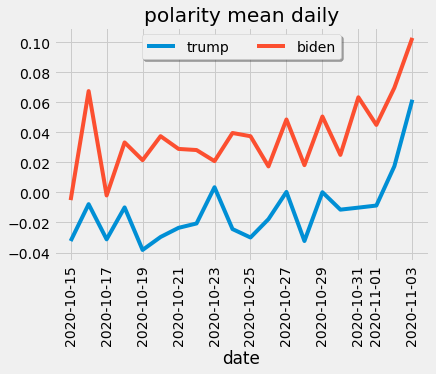

In [347]:
## track the polarity mean among all public daily tweets to see the trend: Biden has always been  above the trump 
trump=dft[dft.trump==1].groupby(pd.Grouper(freq='D'))['sid_overall'].mean()
biden=dft[dft.biden==1].groupby(pd.Grouper(freq='D'))['sid_overall'].mean()
fig,ax=plt.subplots(sharex=True)
ax.plot(trump, label='trump')
ax.legend('trump')
ax.plot(biden, label='biden')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
ax.set(title='polarity mean daily', xlabel='date')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#### sentiment ratio of all tweets for each candidate sentiment 

In [12]:
## including all the data
df_trump=df[df.trump==1]
trump_count=df_trump['sid_overall_sentiment'].value_counts()
trump_count

Negative    52529
Positive    52474
Neutral     41333
Name: sid_overall_sentiment, dtype: int64

Text(0.5, 1.0, 'Trump-mentioned tweets Polarity breakdown')

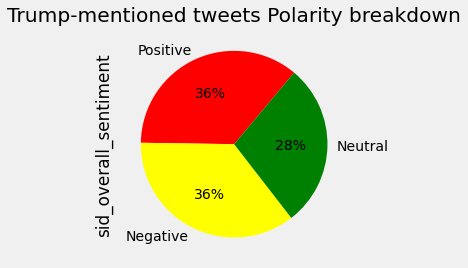

In [300]:
# twitter data for trump 
df_trump['sid_overall_sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['red', 'yellow', 'green'], startangle=50)
plt.title('Trump-mentioned tweets Polarity breakdown')

In [13]:
df_biden=df[df.biden==1]
biden_count=df_biden['sid_overall_sentiment'].value_counts()
biden_count

Positive    40709
Neutral     36632
Negative    31982
Name: sid_overall_sentiment, dtype: int64

Text(0.5, 1.0, 'Biden-mentioned tweets Polarity breakdown')

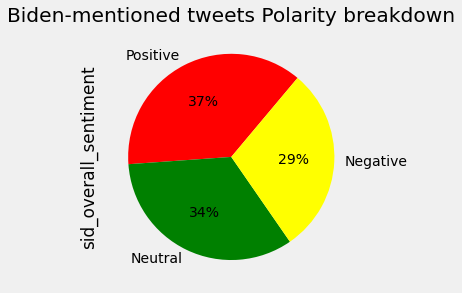

In [14]:
df_biden['sid_overall_sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['red', 'green', 'yellow'], startangle=50)
plt.tight_layout()
plt.title('Biden-mentioned tweets Polarity breakdown')

#### *in Summary: Biden has higher percentage of Positive while lower percentage of Negative tweets compared to Trump. 

In [140]:
total_count_summary=pd.concat([trump_count,biden_count], axis=1, names=['trump', 'biden'])
total_count_summary.columns=['trump', 'biden']
total_count_summary

,trump,biden
Positive,62700,48475
Negative,62447,38751
Neutral,49628,43817


Text(0.5, 1.0, 'Candidates Total Sentiment Summary')

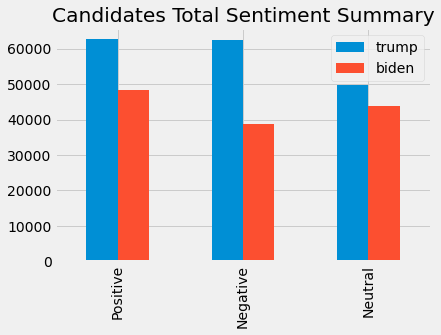

In [145]:
total_count_summary.plot(kind='bar')
plt.title('Candidates Total Sentiment Summary')


In [146]:
## drop the tweets without the states. group the tweets on states
df3=df.dropna()
trump=df3[df3.trump==1][['state','sid_overall_sentiment']]
biden=df3[df3.biden==1][['state','sid_overall_sentiment']]


In [153]:
trump_count_state=trump.groupby(['state','sid_overall_sentiment'])['sid_overall_sentiment'].count()
biden_count_state=biden.groupby(['state','sid_overall_sentiment'])['sid_overall_sentiment'].count()

In [152]:
trump_count_state

state      sid_overall_sentiment
Alabama    Negative                 212
           Neutral                  173
           Positive                 256
Alaska     Negative                  85
           Neutral                   68
                                   ... 
Wisconsin  Neutral                  334
           Positive                 438
Wyoming    Negative                  74
           Neutral                   71
           Positive                  89
Name: sid_overall_sentiment, Length: 158, dtype: int64

In [154]:
total_state_count=pd.concat([trump_count_state, biden_count_state], axis=1)

In [157]:
total_state_count.columns=['trump', 'biden']

In [158]:
total_state_count

trump  biden
state     sid_overall_sentiment              
Alabama   Negative               212.0    211
          Neutral                173.0    212
          Positive               256.0    261
Alaska    Negative                85.0    107
          Neutral                 68.0     97
...                                ...    ...
Wisconsin Neutral                334.0    409
          Positive               438.0    465
Wyoming   Negative                74.0     65
          Neutral                 71.0     65
          Positive                89.0     78

[159 rows x 2 columns]

In [168]:
df4=total_state_count.copy()
df4.reset_index(level=['sid_overall_sentiment'], inplace=True)
df4.head()

,sid_overall_sentiment,trump,biden
state,,,
Alabama,Negative,212.0,211
Alabama,Neutral,173.0,212
Alabama,Positive,256.0,261
Alaska,Negative,85.0,107
Alaska,Neutral,68.0,97


In [276]:
df5=df4.sort_values(by='trump_total', ascending=False).reset_index()
df5.head()

,state,sid_overall_sentiment,trump,biden,trump_total,biden_total,pos_vote_trump
0,California,Negative,9277.0,5411,25113.0,18363,2
1,California,Neutral,7110.0,6159,25113.0,18363,2
2,California,Positive,8726.0,6793,25113.0,18363,2
3,New York,Positive,6507.0,5329,18885.0,14119,2
4,New York,Neutral,5262.0,4319,18885.0,14119,2
...,...,...,...,...,...,...,...
154,South Dakota,Negative,19.0,16,54.0,55,2
155,South Dakota,Neutral,11.0,17,54.0,55,2
156,Guam,Negative,1.0,1,2.0,2,3
157,Guam,Neutral,1.0,1,2.0,2,3


In [279]:
## calculate the trump possibility
def pos_vote(index):
    positive=index[index['sid_overall_sentiment']=='Positive']
    neutral=index[index['sid_overall_sentiment']=='Neutral']
    Negative=index[index['sid_overall_sentiment']=='Negative']
    trump_neutral=neutral['trump']
    trump_negative=Negative['trump']
    trump_positive=positive['trump']
    
    pos_trump=(trump_positive+trump_neutral)/(trump_negative+trump_positive+trump_neutral)
    pos_neg_ratio=trump_positive/trump_negative
    
    return pd.Series({'trump_pos':pos_trump.values[0]})
    return pos_neg_ratio

In [282]:
trump_pol=df4.groupby(df4.index).apply(pos_vote)
#trump_pol

In [228]:
# calculate the biden possibility
def pos_biden(index):
    positive=index[index['sid_overall_sentiment']=='Positive']
    neutral=index[index['sid_overall_sentiment']=='Neutral']
    Negative=index[index['sid_overall_sentiment']=='Negative']
  
    biden_neutral=neutral['biden']
    biden_negative=Negative['biden']
    biden_positive=positive['biden']
    
    pos_biden=(biden_positive+biden_neutral)/(biden_negative+biden_positive+biden_neutral)
      
    return pd.Series({'biden_pos':pos_biden.values[0]})

In [283]:
pos_vote1=df4.groupby(df4.index).apply(pos_vote)
#pos_vote1

In [229]:
pos_vote2=df4.groupby(df4.index).apply(pos_biden)
pos_vote2

,biden_pos
state,
Alabama,0.691520
Alaska,0.684366
Arizona,0.696676
Arkansas,0.698113
California,0.705331
Colorado,0.715945
Connecticut,0.721286
Delaware,0.730942
District of Columbia,0.721519


In [234]:
total_pos=pd.concat([pos_vote1, pos_vote2], axis=1).dropna()
total_pos

,trump_pos,biden_pos
state,,
Alabama,0.669267,0.691520
Alaska,0.699647,0.684366
Arizona,0.655994,0.696676
Arkansas,0.686924,0.698113
California,0.630590,0.705331
Colorado,0.650200,0.715945
Connecticut,0.708511,0.721286
Delaware,0.711443,0.730942
District of Columbia,0.648452,0.721519


In [241]:
total_pos.columns

Index(['trump_pos', 'biden_pos'], dtype='object')

In [236]:
total_pos[total_pos.trump_pos==total_pos.biden_pos]  ## there is none the two POS is equal

,trump_pos,biden_pos
state,,


In [250]:
total_pos['difference']=(total_pos['trump_pos']-total_pos['biden_pos'])*100   # percentage

In [261]:
total_pos.loc['Puerto Rico']

trump_pos     0.691542
biden_pos     0.820847
difference    -12.9305
winning          biden
Name: Puerto Rico, dtype: object

In [274]:
state_pre_real=pd.concat([total_pos, winning_state], axis=1)

In [289]:
state_pre_real

,trump_pos,biden_pos,difference,winning,final_winning
Alabama,0.669267,0.691520,-2.225370,biden,trump
Alaska,0.699647,0.684366,1.528086,trump,trump
Arizona,0.655994,0.696676,-4.068273,biden,biden
Arkansas,0.686924,0.698113,-1.118871,biden,trump
California,0.630590,0.705331,-7.474164,biden,biden
Colorado,0.650200,0.715945,-6.574482,biden,biden
Connecticut,0.708511,0.721286,-1.277573,biden,biden
Delaware,0.711443,0.730942,-1.949892,biden,biden
District of Columbia,0.648452,0.721519,-7.306726,biden,biden
Florida,0.683964,0.738983,-5.501909,biden,trump


In [285]:
trump=state_pre_real[state_pre_real.final_winning=='trump']
trump.describe()

,trump_pos,biden_pos,difference
count,25.000000,25.000000,25.000000
mean,0.662664,0.714800,-5.213581
std,0.041642,0.037882,3.445228
min,0.555270,0.665919,-12.230017
25%,0.645804,0.687500,-7.462417
50%,0.669267,0.701695,-5.501909
75%,0.686924,0.732753,-3.934043
max,0.754739,0.835007,1.719401


In [286]:
biden=state_pre_real[state_pre_real.final_winning=='biden']
biden.describe()

,trump_pos,biden_pos,difference
count,26.000000,26.000000,26.000000
mean,0.640709,0.701551,-6.084222
std,0.048898,0.034693,3.644500
min,0.523688,0.624365,-11.654492
25%,0.619588,0.680680,-8.588961
50%,0.639521,0.698606,-7.083414
75%,0.676226,0.720063,-4.299261
max,0.718062,0.778243,2.840650


### * attempts to use possibility to predict the winning candidate did not work. 

### use wordcloud to generate the positive, negative words for each candidate 

In [30]:
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [18]:
df=pd.read_csv('before_election.csv')
trump_positive=df[(df.trump==1)& (df.sid_overall_sentiment=='Positive')]['tweet_cleaned'].to_list()
trump_negative=df[(df.trump==1)&(df.sid_overall<0)]['tweet_cleaned'].to_list()
biden_positive=df[(df.biden==1)&(df.sid_overall>0)]['tweet_cleaned'].to_list()
biden_negative=df[(df.biden==1)& (df.sid_overall<0)]['tweet_cleaned'].to_list()

In [10]:
categories=[trump_positive,trump_negative,biden_positive, biden_negative]

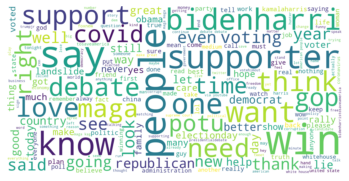

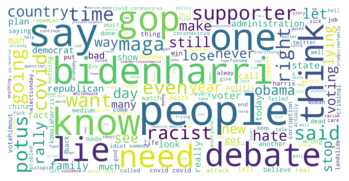

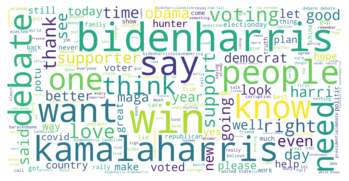

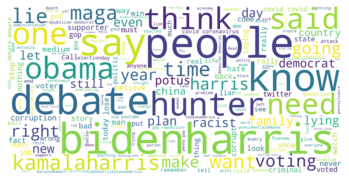

In [32]:
for i in categories:
    cloud = WordCloud(stopwords=stopwords, width=1600, height=800, max_font_size=200, background_color="white").generate(' '.join(i))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()